In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [91]:
df = pd.read_csv("dataset/german_credit_data.csv")

# Exploratory Data Analysis

In [92]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [94]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df.duplicated().sum()

np.int64(0)

In [96]:
df.drop(columns = "Unnamed: 0", inplace=True)

## Handling Missing Values

In [97]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [98]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

## Feature engineering

In [99]:
df['Credit_per_month'] = df['Credit amount'] / df['Duration']

In [100]:
df['Has_savings'] = df['Saving accounts'].apply(lambda x: 0 if x == 'unknown' else 1)
df['Has_checking'] = df['Checking account'].apply(lambda x: 0 if x == 'unknown' else 1)

In [101]:
df['Age_bin'] = pd.cut(
    df['Age'],
    bins=[18, 25, 35, 45, 60, 100],
    labels=['18-25', '26-35', '36-45', '46-60', '60+']
)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   object  
 2   Job               1000 non-null   int64   
 3   Housing           1000 non-null   object  
 4   Saving accounts   1000 non-null   object  
 5   Checking account  1000 non-null   object  
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   object  
 9   Risk              1000 non-null   object  
 10  Credit_per_month  1000 non-null   float64 
 11  Has_savings       1000 non-null   int64   
 12  Has_checking      1000 non-null   int64   
 13  Age_bin           1000 non-null   category
dtypes: category(1), float64(1), int64(6), object(6)
memory usage: 102.9+ KB


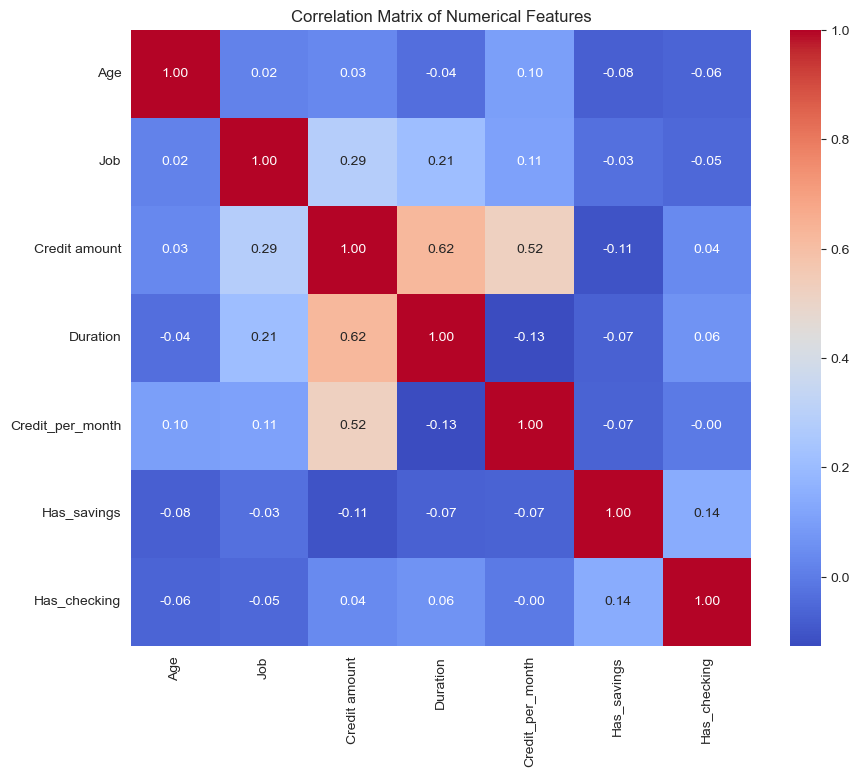

In [103]:
num_cols = ['Age', 'Job', 'Credit amount', 'Duration', 'Credit_per_month', 'Has_savings', 'Has_checking']

corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

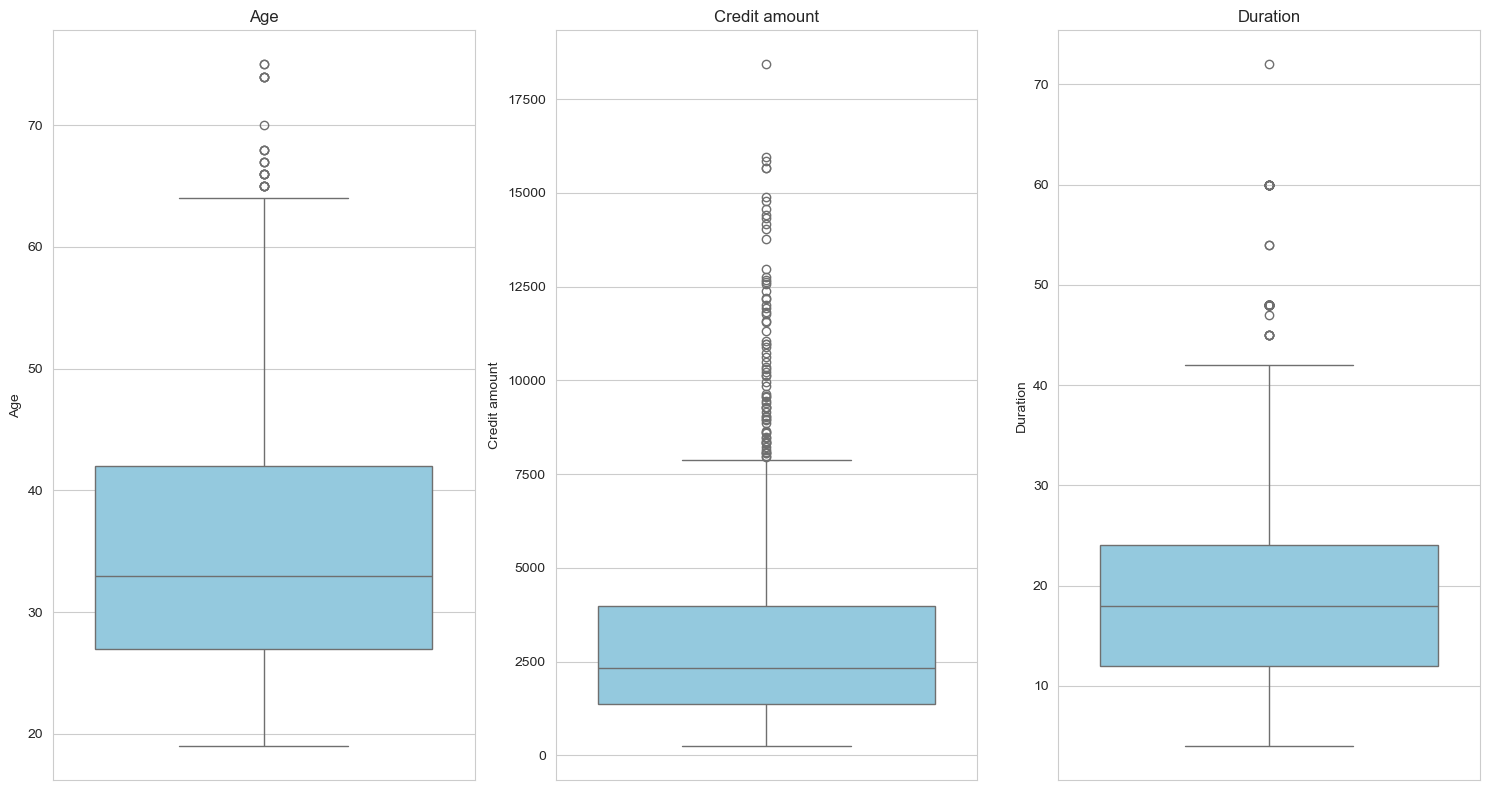

In [104]:
plt.figure(figsize=(15,8))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = df[col], color = "skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [105]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit_per_month,Has_savings,Has_checking,Age_bin
29,63,male,2,own,little,little,6836,60,business,bad,113.933333,1,1,60+
134,21,female,2,own,moderate,unknown,10144,60,radio/TV,good,169.066667,1,0,18-25
255,27,male,1,own,unknown,moderate,7418,60,radio/TV,good,123.633333,0,1,26-35
332,24,female,3,own,moderate,moderate,7408,60,car,bad,123.466667,1,1,18-25
373,63,male,3,free,unknown,unknown,13756,60,car,good,229.266667,0,0,60+
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad,246.366667,1,1,46-60
616,27,male,3,free,unknown,moderate,9157,60,radio/TV,good,152.616667,0,1,26-35
637,21,male,2,own,little,unknown,15653,60,radio/TV,good,260.883333,1,0,18-25
672,42,male,3,own,little,unknown,10366,60,car,good,172.766667,1,0,36-45
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad,77.708333,1,1,18-25


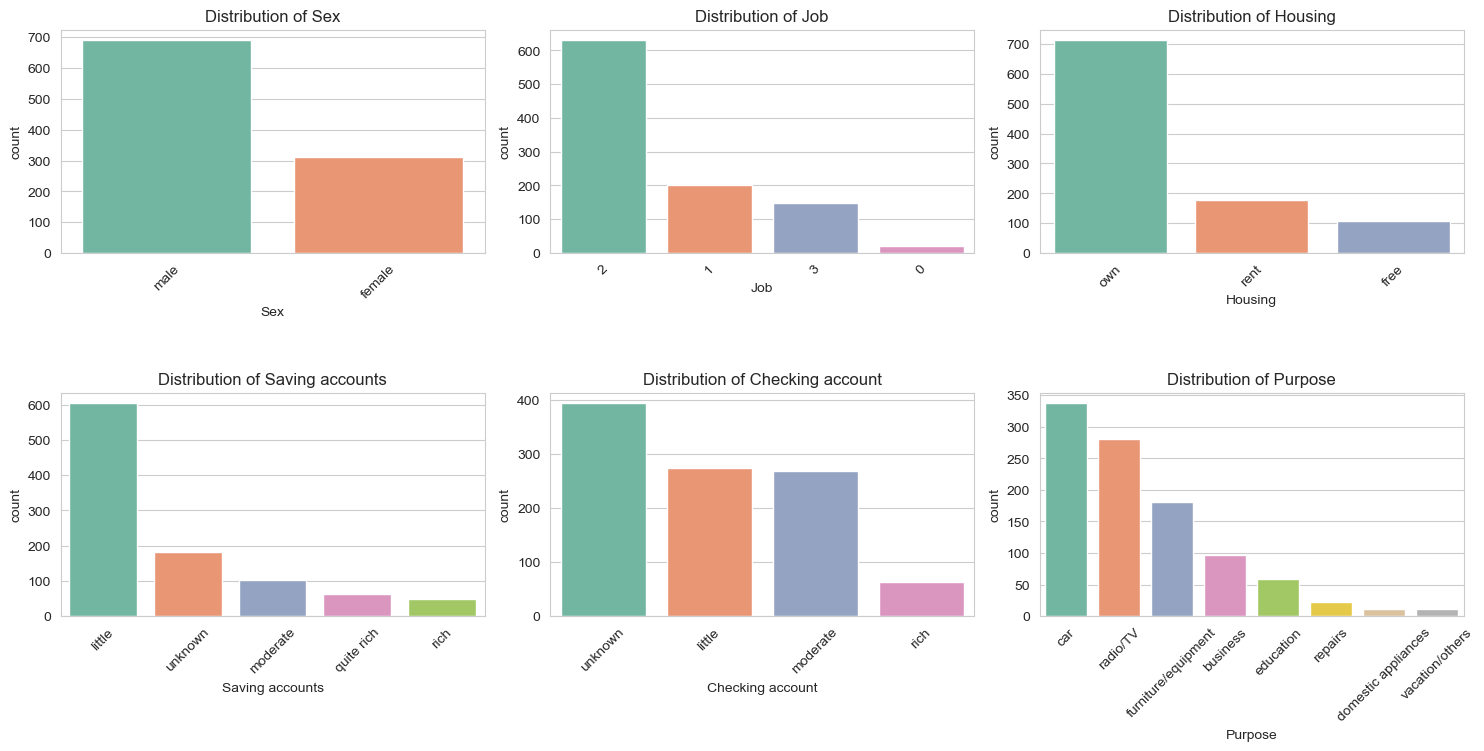

In [106]:
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data = df, x = col, palette = "Set2", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Average credit amount by job type and sex

In [107]:
df.groupby('Job')['Credit amount'].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [108]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

### Comparing credit amounts across categories.

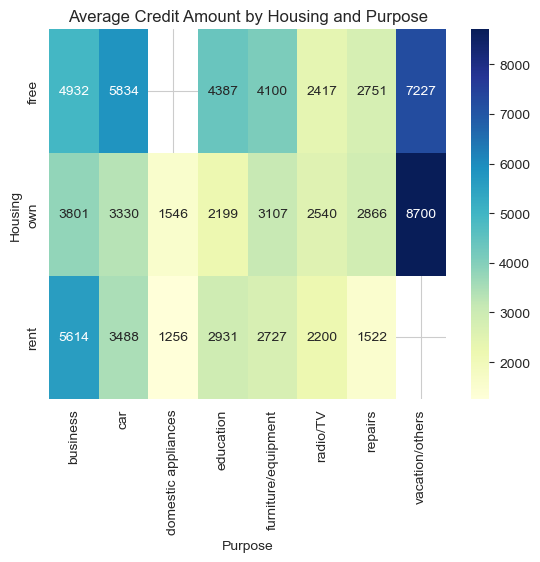

In [109]:
pivot = pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Credit Amount by Housing and Purpose")
plt.show()


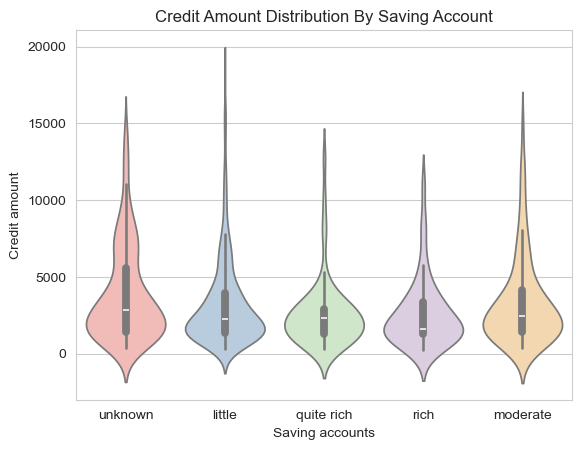

In [110]:
sns.violinplot(data = df, x = "Saving accounts", y = "Credit amount", palette = "Pastel1")
plt.title("Credit Amount Distribution By Saving Account")
plt.show()

The violin plot shows that applicants with little to moderate and unknown savings request larger and more variable credit amounts, indicating higher financial risk compared to those with rich or quite rich savings

### Relationship btwn Age, Credit amount and Duration

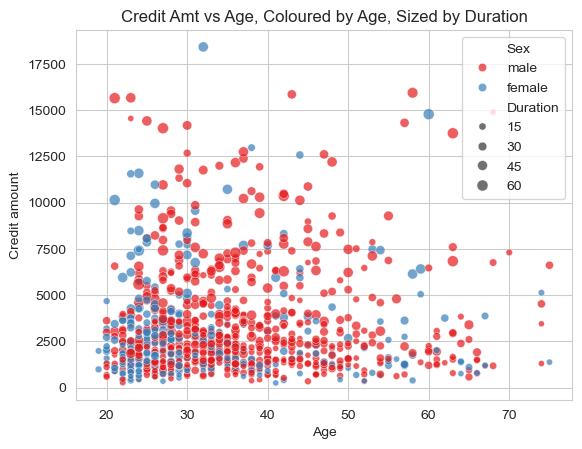

In [111]:
sns.scatterplot(data = df, x = "Age", y = "Credit amount", hue = "Sex", size = "Duration", alpha = 0.7, palette = "Set1")
plt.title("Credit Amt vs Age, Coloured by Age, Sized by Duration")
plt.show()

In [112]:
df["Risk"].value_counts(normalize=True) * 100

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

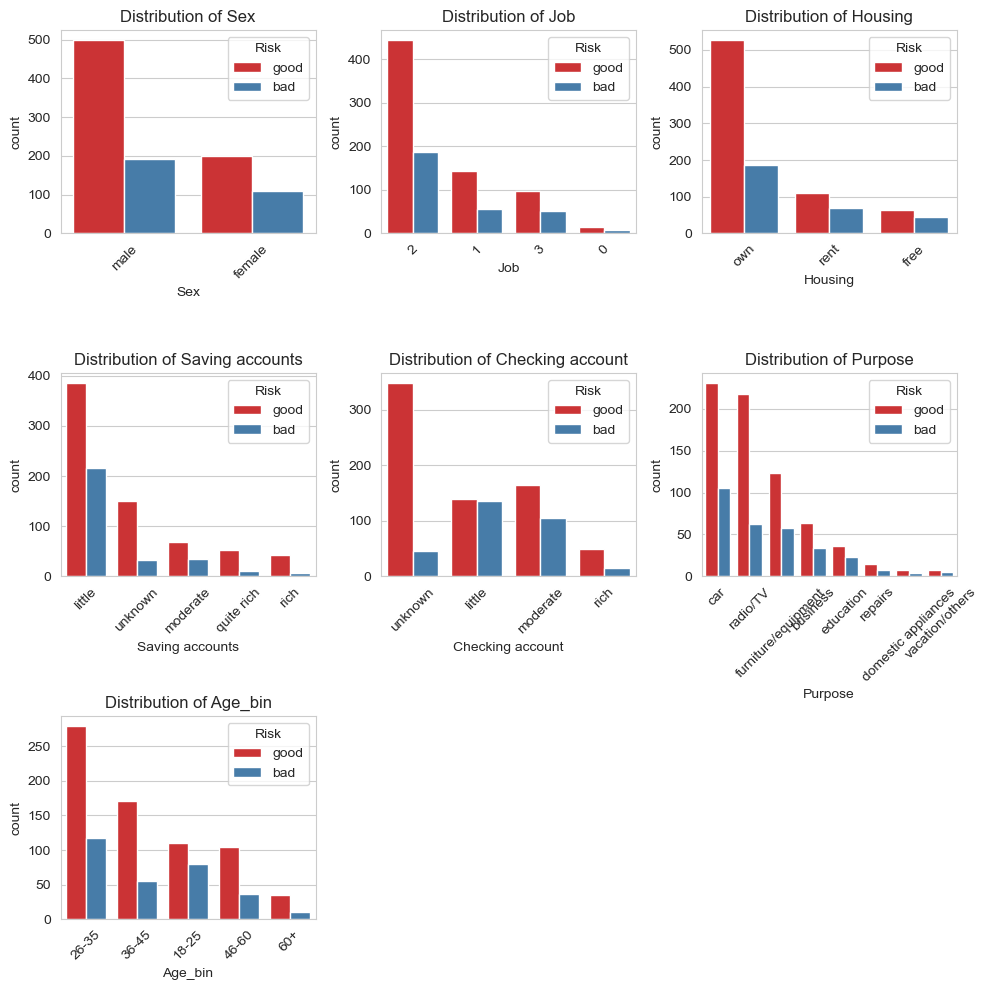

In [113]:
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Age_bin']

plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data = df, x = col, hue = "Risk", palette = "Set1", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

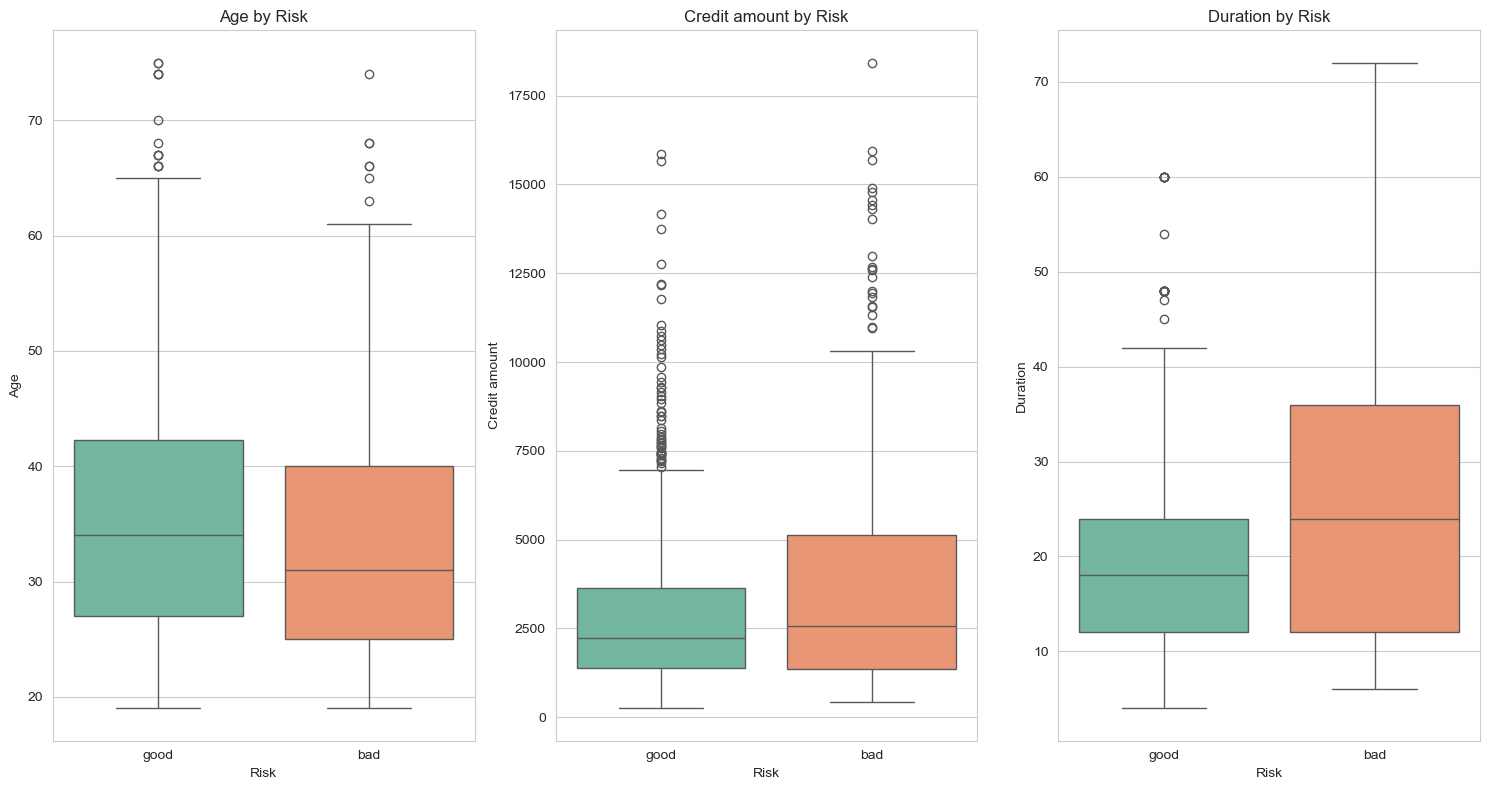

In [114]:
plt.figure(figsize=(15,8))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Risk', y=col, data=df, palette="Set2")
    plt.title(f'{col} by Risk')

plt.tight_layout()
plt.show()


In [115]:
df.groupby("Risk")[['Age', 'Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [116]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Credit_per_month',
       'Has_savings', 'Has_checking', 'Age_bin'],
      dtype='object')

## Feature Selection

In [117]:
features = ['Risk','Age_bin','Sex','Job','Housing','Saving accounts','Checking account','Purpose','Credit amount','Duration','Credit_per_month','Has_savings','Has_checking']

df_model = df[features].copy()
df_model.head()

,Risk,Age_bin,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Credit amount,Duration,Credit_per_month,Has_savings,Has_checking
0,good,60+,male,2,own,unknown,little,radio/TV,1169,6,194.833333,0,1
1,bad,18-25,female,2,own,little,moderate,radio/TV,5951,48,123.979167,1,1
2,good,46-60,male,1,own,little,unknown,education,2096,12,174.666667,1,0
3,good,36-45,male,2,free,little,little,furniture/equipment,7882,42,187.666667,1,1
4,bad,46-60,male,2,free,little,little,car,4870,24,202.916667,1,1


## Encoding Categorical Columns

In [118]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Encoding independent variables
cat_cols = df_model.select_dtypes(include=['object', 'category']).columns.drop("Risk")

le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"models/{col}_encoder.pkl")

# Encoding target variable
target_le = LabelEncoder()
df_model["Risk"] = target_le.fit_transform(df_model["Risk"])

# Exporting the label encoder target
joblib.dump(target_le, "models/Risk_encoder.pkl")


['Risk_encoder.pkl']

In [119]:
df_model.head()

,Risk,Age_bin,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Credit amount,Duration,Credit_per_month,Has_savings,Has_checking
0,1,4,1,2,1,4,0,5,1169,6,194.833333,0,1
1,0,0,0,2,1,0,1,5,5951,48,123.979167,1,1
2,1,3,1,1,1,0,3,3,2096,12,174.666667,1,0
3,1,2,1,2,0,0,0,4,7882,42,187.666667,1,1
4,0,3,1,2,0,0,0,1,4870,24,202.916667,1,1


## Train - Test Split

In [120]:
from sklearn.model_selection import train_test_split

X = df_model.drop("Risk", axis = 1)
y = df_model["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1000, 12) (800, 12) (200, 12)


# Model Training

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [122]:
# Helper function for model training
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

### Decision Tree Classifier

In [123]:
dt = DecisionTreeClassifier(random_state = 2, class_weight = "balanced")
dt_param_grid = {
    "max_depth": [10, 15, 20, None],
    "min_samples_split": [1, 2, 5],
    "min_samples_leaf": [2, 4, 6]  
}

best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

print("Decision Tree Accuracy", acc_dt)
print("Best Parameters", params_dt)

Decision Tree Accuracy 0.6
Best Parameters {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


### Random Forest Classifier

In [124]:
rf = RandomForestClassifier(random_state = 2, class_weight = "balanced", n_jobs = -1)
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]  
}

best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

print("Random Forest Accuracy", acc_rf)
print("Best Parameters", params_rf)

Random Forest Accuracy 0.68
Best Parameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### Extra Trees Classifier

In [125]:
et = ExtraTreesClassifier(random_state = 2, class_weight = "balanced", n_jobs = -1)
et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]  
}

best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

print("ExtraTrees Accuracy", acc_et)
print("Best Parameters", params_et)

ExtraTrees Accuracy 0.65
Best Parameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


### XGBoost Classifier

In [126]:
xgb = XGBClassifier(random_state=2, scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), use_label_encoder=False, eval_metric="logloss")

xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]  
}

best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

print("XGBoost Accuracy", acc_xgb)
print("Best Parameters", params_xgb)

XGBoost Accuracy 0.635
Best Parameters {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}


In [127]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

class_weights = [1, neg / pos]

cat = CatBoostClassifier(random_state=2, loss_function="Logloss", eval_metric="AUC", class_weights=class_weights, verbose=False)

cat_param_grid = {
    "iterations": [200, 500],
    "depth": [4, 6, 8],
    "learning_rate": [0.01, 0.1],
    "l2_leaf_reg": [1, 3, 5],
    "bagging_temperature": [0, 1]
}

best_cat, acc_cat, params_cat = train_model(cat, cat_param_grid, X_train, y_train, X_test, y_test)

print("CatBoost Accuracy:", acc_cat)
print("Best Parameters:", params_cat)

CatBoost Accuracy: 0.62
Best Parameters: {'bagging_temperature': 0, 'depth': 8, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.01}


# Saving trained Random Forest model to a file

In [128]:
joblib.dump(best_rf, "models/rf_credit_model.pkl")

['rf_credit_model.pkl']